In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shap

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from catboost import CatBoostClassifier

In [2]:
sns.set()

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# TYPE DICT

Формируем словарь с типами данных, чтобы при загрузке данных не потреблялось слишком много ОЗУ

In [4]:
types_dict = {
'feature_31': 'int8',
'feature_43': 'int8',
'feature_61': 'int8',
'feature_64': 'int8',
'feature_80': 'int8',
'feature_83': 'int8',
'feature_92': 'int8',
'feature_133': 'int8',
'feature_143': 'int8',
'feature_191': 'int8',
'feature_201': 'int8',
'feature_209': 'int8',
'feature_251': 'int8',
'feature_253': 'int8',
'feature_299': 'int8',
'feature_300': 'int8',
'feature_343': 'int8',
'feature_382': 'int8',
'feature_392': 'int8',
'feature_406': 'int8',
'feature_423': 'int8',
'feature_446': 'int8',
'feature_449': 'int8',
'feature_459': 'int8',
'feature_490': 'int8',
'feature_17': 'int8',
'feature_21': 'int8',
'feature_22': 'int8',
'feature_27': 'int8',
'feature_166': 'int8',
'feature_173': 'int8',
'feature_347': 'int8',
'feature_405': 'int8',
'feature_434': 'int8',
'feature_492': 'int8',
'target': 'int8',
'feature_1': 'float16',
'feature_2': 'float16',
'feature_3': 'float16',
'feature_4': 'float16',
'feature_5': 'float16',
'feature_6': 'float16',
'feature_7': 'float16',
'feature_8': 'float16',
'feature_9': 'float16',
'feature_10': 'float16',
'feature_11': 'float16',
'feature_12': 'float16',
'feature_13': 'float16',
'feature_14': 'float16',
'feature_15': 'float16',
'feature_16': 'float16',
'feature_18': 'float16',
'feature_19': 'float16',
'feature_20': 'float16',
'feature_23': 'float16',
'feature_24': 'float16',
'feature_25': 'float16',
'feature_26': 'float16',
'feature_28': 'float16',
'feature_29': 'float16',
'feature_30': 'float16',
'feature_32': 'float16',
'feature_33': 'float16',
'feature_34': 'float16',
'feature_35': 'float16',
'feature_36': 'float16',
'feature_37': 'float16',
'feature_38': 'float16',
'feature_39': 'float16',
'feature_40': 'float16',
'feature_41': 'float16',
'feature_42': 'float16',
'feature_44': 'float16',
'feature_45': 'float16',
'feature_46': 'float16',
'feature_47': 'float16',
'feature_48': 'float16',
'feature_49': 'float16',
'feature_50': 'float16',
'feature_51': 'float16',
'feature_52': 'float16',
'feature_53': 'float16',
'feature_54': 'float16',
'feature_55': 'float16',
'feature_56': 'float16',
'feature_57': 'float16',
'feature_58': 'float16',
'feature_59': 'float16',
'feature_60': 'float16',
'feature_62': 'float16',
'feature_63': 'float16',
'feature_65': 'float16',
'feature_66': 'float16',
'feature_67': 'float16',
'feature_68': 'float16',
'feature_69': 'float16',
'feature_70': 'float16',
'feature_71': 'float16',
'feature_72': 'float16',
'feature_73': 'float16',
'feature_74': 'float16',
'feature_75': 'float16',
'feature_76': 'float16',
'feature_77': 'float16',
'feature_78': 'float16',
'feature_79': 'float16',
'feature_81': 'float16',
'feature_82': 'float16',
'feature_84': 'float16',
'feature_85': 'float16',
'feature_86': 'float16',
'feature_87': 'float16',
'feature_88': 'float16',
'feature_89': 'float16',
'feature_90': 'float16',
'feature_91': 'float16',
'feature_93': 'float16',
'feature_94': 'float16',
'feature_95': 'float16',
'feature_96': 'float16',
'feature_97': 'float16',
'feature_98': 'float16',
'feature_99': 'float16',
'feature_100': 'float16',
'feature_101': 'float16',
'feature_102': 'float16',
'feature_103': 'float16',
'feature_104': 'float16',
'feature_105': 'float16',
'feature_106': 'float16',
'feature_107': 'float16',
'feature_108': 'float16',
'feature_109': 'float16',
'feature_110': 'float16',
'feature_111': 'float16',
'feature_112': 'float16',
'feature_113': 'float16',
'feature_114': 'float16',
'feature_115': 'float16',
'feature_116': 'float16',
'feature_117': 'float16',
'feature_118': 'float16',
'feature_119': 'float16',
'feature_120': 'float16',
'feature_121': 'float16',
'feature_122': 'float16',
'feature_123': 'float16',
'feature_124': 'float16',
'feature_125': 'float16',
'feature_126': 'float16',
'feature_127': 'float16',
'feature_128': 'float16',
'feature_129': 'float16',
'feature_130': 'float16',
'feature_131': 'float16',
'feature_132': 'float16',
'feature_134': 'float16',
'feature_135': 'float16',
'feature_136': 'float16',
'feature_137': 'float16',
'feature_138': 'float16',
'feature_139': 'float16',
'feature_140': 'float16',
'feature_141': 'float16',
'feature_142': 'float16',
'feature_144': 'float16',
'feature_145': 'float16',
'feature_146': 'float16',
'feature_147': 'float16',
'feature_148': 'float16',
'feature_149': 'float16',
'feature_150': 'float16',
'feature_151': 'float16',
'feature_152': 'float16',
'feature_153': 'float16',
'feature_154': 'float16',
'feature_155': 'float16',
'feature_156': 'float16',
'feature_157': 'float16',
'feature_158': 'float16',
'feature_159': 'float16',
'feature_160': 'float16',
'feature_161': 'float16',
'feature_162': 'float16',
'feature_163': 'float16',
'feature_164': 'float16',
'feature_165': 'float16',
'feature_167': 'float16',
'feature_168': 'float16',
'feature_169': 'float16',
'feature_170': 'float16',
'feature_171': 'float16',
'feature_172': 'float16',
'feature_174': 'float16',
'feature_175': 'float16',
'feature_176': 'float16',
'feature_177': 'float16',
'feature_178': 'float16',
'feature_179': 'float16',
'feature_180': 'float16',
'feature_181': 'float16',
'feature_182': 'float16',
'feature_183': 'float16',
'feature_184': 'float16',
'feature_185': 'float16',
'feature_186': 'float16',
'feature_187': 'float16',
'feature_188': 'float16',
'feature_189': 'float16',
'feature_190': 'float16',
'feature_192': 'float16',
'feature_193': 'float16',
'feature_194': 'float16',
'feature_195': 'float16',
'feature_196': 'float16',
'feature_197': 'float16',
'feature_198': 'float16',
'feature_199': 'float16',
'feature_200': 'float16',
'feature_202': 'float16',
'feature_203': 'float16',
'feature_204': 'float16',
'feature_205': 'float16',
'feature_206': 'float16',
'feature_207': 'float16',
'feature_208': 'float16',
'feature_210': 'float16',
'feature_211': 'float16',
'feature_212': 'float16',
'feature_213': 'float16',
'feature_214': 'float16',
'feature_215': 'float16',
'feature_216': 'float16',
'feature_217': 'float16',
'feature_218': 'float16',
'feature_219': 'float16',
'feature_220': 'float16',
'feature_221': 'float16',
'feature_222': 'float16',
'feature_223': 'float16',
'feature_224': 'float16',
'feature_225': 'float16',
'feature_226': 'float16',
'feature_227': 'float16',
'feature_228': 'float16',
'feature_229': 'float16',
'feature_230': 'float16',
'feature_231': 'float16',
'feature_232': 'float16',
'feature_233': 'float16',
'feature_234': 'float16',
'feature_235': 'float16',
'feature_236': 'float16',
'feature_237': 'float16',
'feature_238': 'float16',
'feature_239': 'float16',
'feature_240': 'float16',
'feature_241': 'float16',
'feature_242': 'float16',
'feature_243': 'float16',
'feature_244': 'float16',
'feature_245': 'float16',
'feature_246': 'float16',
'feature_247': 'float16',
'feature_248': 'float16',
'feature_249': 'float16',
'feature_250': 'float16',
'feature_252': 'float16',
'feature_254': 'float16',
'feature_255': 'float16',
'feature_256': 'float16',
'feature_257': 'float16',
'feature_258': 'float16',
'feature_259': 'float16',
'feature_260': 'float16',
'feature_261': 'float16',
'feature_262': 'float16',
'feature_263': 'float16',
'feature_264': 'float16',
'feature_265': 'float16',
'feature_266': 'float16',
'feature_267': 'float16',
'feature_268': 'float16',
'feature_269': 'float16',
'feature_270': 'float16',
'feature_271': 'float16',
'feature_272': 'float16',
'feature_273': 'float16',
'feature_274': 'float16',
'feature_275': 'float16',
'feature_276': 'float16',
'feature_277': 'float16',
'feature_278': 'float16',
'feature_279': 'float16',
'feature_280': 'float16',
'feature_281': 'float16',
'feature_282': 'float16',
'feature_283': 'float16',
'feature_284': 'float16',
'feature_285': 'float16',
'feature_286': 'float16',
'feature_287': 'float16',
'feature_288': 'float16',
'feature_289': 'float16',
'feature_290': 'float16',
'feature_291': 'float16',
'feature_292': 'float16',
'feature_293': 'float16',
'feature_294': 'float16',
'feature_295': 'float16',
'feature_296': 'float16',
'feature_297': 'float16',
'feature_298': 'float16',
'feature_301': 'float16',
'feature_302': 'float16',
'feature_303': 'float16',
'feature_304': 'float16',
'feature_305': 'float16',
'feature_306': 'float16',
'feature_307': 'float16',
'feature_308': 'float16',
'feature_309': 'float16',
'feature_310': 'float16',
'feature_311': 'float16',
'feature_312': 'float16',
'feature_313': 'float16',
'feature_314': 'float16',
'feature_315': 'float16',
'feature_316': 'float16',
'feature_317': 'float16',
'feature_318': 'float16',
'feature_319': 'float16',
'feature_320': 'float16',
'feature_321': 'float16',
'feature_322': 'float16',
'feature_323': 'float16',
'feature_324': 'float16',
'feature_325': 'float16',
'feature_326': 'float16',
'feature_327': 'float16',
'feature_328': 'float16',
'feature_329': 'float16',
'feature_330': 'float16',
'feature_331': 'float16',
'feature_332': 'float16',
'feature_333': 'float16',
'feature_334': 'float16',
'feature_335': 'float16',
'feature_336': 'float16',
'feature_337': 'float16',
'feature_338': 'float16',
'feature_339': 'float16',
'feature_340': 'float16',
'feature_341': 'float16',
'feature_342': 'float16',
'feature_344': 'float16',
'feature_345': 'float16',
'feature_346': 'float16',
'feature_348': 'float16',
'feature_349': 'float16',
'feature_350': 'float16',
'feature_351': 'float16',
'feature_352': 'float16',
'feature_353': 'float16',
'feature_354': 'float16',
'feature_355': 'float16',
'feature_356': 'float16',
'feature_357': 'float16',
'feature_358': 'float16',
'feature_359': 'float16',
'feature_360': 'float16',
'feature_361': 'float16',
'feature_362': 'float16',
'feature_363': 'float16',
'feature_364': 'float16',
'feature_365': 'float16',
'feature_366': 'float16',
'feature_367': 'float16',
'feature_368': 'float16',
'feature_369': 'float16',
'feature_370': 'float16',
'feature_371': 'float16',
'feature_372': 'float16',
'feature_373': 'float16',
'feature_374': 'float16',
'feature_375': 'float16',
'feature_376': 'float16',
'feature_377': 'float16',
'feature_378': 'float16',
'feature_379': 'float16',
'feature_380': 'float16',
'feature_381': 'float16',
'feature_383': 'float16',
'feature_384': 'float16',
'feature_385': 'float16',
'feature_386': 'float16',
'feature_387': 'float16',
'feature_388': 'float16',
'feature_389': 'float16',
'feature_390': 'float16',
'feature_391': 'float16',
'feature_393': 'float16',
'feature_394': 'float16',
'feature_395': 'float16',
'feature_396': 'float16',
'feature_397': 'float16',
'feature_398': 'float16',
'feature_399': 'float16',
'feature_400': 'float16',
'feature_401': 'float16',
'feature_402': 'float16',
'feature_403': 'float16',
'feature_404': 'float16',
'feature_407': 'float16',
'feature_408': 'float16',
'feature_409': 'float16',
'feature_410': 'float16',
'feature_411': 'float16',
'feature_412': 'float16',
'feature_413': 'float16',
'feature_414': 'float16',
'feature_415': 'float16',
'feature_416': 'float16',
'feature_417': 'float16',
'feature_418': 'float16',
'feature_419': 'float16',
'feature_420': 'float16',
'feature_421': 'float16',
'feature_422': 'float16',
'feature_424': 'float16',
'feature_425': 'float16',
'feature_426': 'float16',
'feature_427': 'float16',
'feature_428': 'float16',
'feature_429': 'float16',
'feature_430': 'float16',
'feature_431': 'float16',
'feature_432': 'float16',
'feature_433': 'float16',
'feature_435': 'float16',
'feature_436': 'float16',
'feature_437': 'float16',
'feature_438': 'float16',
'feature_439': 'float16',
'feature_440': 'float16',
'feature_441': 'float16',
'feature_442': 'float16',
'feature_443': 'float16',
'feature_444': 'float16',
'feature_445': 'float16',
'feature_447': 'float16',
'feature_448': 'float16',
'feature_450': 'float16',
'feature_451': 'float16',
'feature_452': 'float16',
'feature_453': 'float16',
'feature_454': 'float16',
'feature_455': 'float16',
'feature_456': 'float16',
'feature_457': 'float16',
'feature_458': 'float16',
'feature_460': 'float16',
'feature_461': 'float16',
'feature_462': 'float16',
'feature_463': 'float16',
'feature_464': 'float16',
'feature_465': 'float16',
'feature_466': 'float16',
'feature_467': 'float16',
'feature_468': 'float16',
'feature_469': 'float16',
'feature_470': 'float16',
'feature_471': 'float16',
'feature_472': 'float16',
'feature_473': 'float16',
'feature_474': 'float16',
'feature_475': 'float16',
'feature_476': 'float16',
'feature_477': 'float16',
'feature_478': 'float16',
'feature_479': 'float16',
'feature_480': 'float16',
'feature_481': 'float16',
'feature_482': 'float16',
'feature_483': 'float16',
'feature_484': 'float16',
'feature_485': 'float16',
'feature_486': 'float16',
'feature_487': 'float16',
'feature_488': 'float16',
'feature_489': 'float16',
'feature_491': 'float16',
'feature_493': 'float16',
'feature_494': 'float16',
'feature_495': 'float16',
'feature_496': 'float16',
'feature_497': 'float16',
'feature_498': 'float16',
'feature_499': 'float16',
'feature_500': 'float16'
}

# UPLOADING DATA

Загружаем данные

In [5]:
# Путь к папке с тренировочными данными
path_train = '/content/drive/MyDrive/alpha_hack_data/train/'
# Путь к папке с тестовыми данными
path_test = '/content/drive/MyDrive/alpha_hack_data/test/'

In [ ]:
print(*[f'Список файлов в репозитории {x.split("/")[-1]}: {sorted(os.listdir(x), key=lambda x: len(x))}' for x in [path_train, path_test]], sep='\n')

Список файлов в репозитории : ['train_1.csv', 'train_2.csv', 'train_3.csv', 'train_4.csv', 'train_5.csv', 'train_6.csv', 'train_7.csv', 'train_8.csv', 'train_9.csv', 'train_10.csv']
Список файлов в репозитории : ['test_1.csv', 'test_2.csv', 'test_3.csv', 'test_4.csv', 'test_5.csv', 'test_6.csv', 'test_7.csv', 'test_8.csv', 'test_9.csv', 'test_10.csv']


In [6]:
train = pd.read_csv(path_train + 'train_1.csv', dtype=types_dict)

In [7]:
for i in range(2, 11):
    train = pd.concat([train, pd.read_csv(path_train + f'train_{i}.csv', dtype=types_dict)])

In [8]:
train = train.drop(['smpl', 'id'], axis=1)

In [9]:
train

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_491,feature_492,feature_493,feature_494,feature_495,feature_496,feature_497,feature_498,feature_499,feature_500
0,0,0.372314,1.500977,2.132812,-0.957520,-0.119019,0.122925,0.151001,0.506836,-0.839355,...,-1.254883,0,0.803711,-1.017578,-0.520996,0.646973,1.454102,-0.833496,0.184082,-0.438232
1,0,0.382324,0.962402,-0.192505,-1.019531,-1.330078,-0.100159,-1.130859,-1.172852,-1.790039,...,-0.884277,0,-1.643555,-1.264648,-1.523438,0.604980,0.491943,-0.003685,0.469727,-1.094727
2,0,0.472412,-0.695312,0.538086,-0.032990,-0.364746,-0.441895,-0.035950,-0.921387,0.746582,...,-0.322754,0,-0.496826,-0.051941,0.743164,-1.395508,0.147949,-0.007553,-0.981445,0.270996
3,0,0.512207,-1.232422,0.555176,1.457031,1.435547,0.168579,-0.628906,0.249756,1.475586,...,0.976562,0,1.182617,-0.178711,1.467773,-0.791016,0.000645,0.674805,0.803223,1.037109
4,0,1.488281,-0.164429,-1.197266,1.548828,0.952637,1.144531,-0.963867,0.031891,1.262695,...,-1.655273,0,1.076172,-0.555664,1.249023,-0.485840,0.458740,-0.444580,-0.333740,0.380127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449049,1,-0.276367,-0.344482,0.609863,-0.214722,-0.345947,0.772461,-0.074585,2.414062,2.994141,...,2.000000,0,2.474609,1.364258,2.972656,1.421875,-0.688965,1.313477,0.201904,0.562988
449050,0,-0.270996,-1.203125,-0.068298,0.587891,0.373535,1.384766,-0.474854,1.772461,0.625000,...,0.808594,0,3.041016,0.568359,0.613281,-1.115234,2.103516,1.550781,-0.843262,-0.333740
449051,0,0.616211,-1.386719,1.023438,-1.549805,1.183594,3.136719,1.113281,3.097656,2.240234,...,3.128906,0,2.220703,-0.923340,2.207031,3.003906,0.151123,1.565430,-0.528809,-0.351562
449052,0,-2.146484,-1.831055,0.590820,0.657227,-1.164062,0.397461,0.155518,0.782715,-0.567383,...,1.198242,0,-0.649902,0.685059,-0.877441,-0.434326,-1.021484,-0.267090,-0.418457,-0.224731


In [ ]:
train = train.reset_index(drop=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4490468 entries, 0 to 4490467
Columns: 501 entries, target to feature_500
dtypes: float16(465), int8(36)
memory usage: 4.0 GB


In [ ]:
train.isna().sum().sum()

0

In [ ]:
train.duplicated().sum()

0

Нет пропусков и дубликатов

# **EDA**

Приступим к исследовательскому анализу данных

для начала изучим корреляции

In [10]:
correlation_matrix = train.corr() # очень долго считается!

In [11]:
correlation_matrix = abs(correlation_matrix)

In [14]:
correlation_matrix

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_491,feature_492,feature_493,feature_494,feature_495,feature_496,feature_497,feature_498,feature_499,feature_500
target,1.000000,0.015758,0.004472,3.969410e-04,0.009194,0.031279,0.006512,0.000370,0.023131,0.026088,...,0.018851,0.018781,0.035541,0.035174,0.027298,0.015821,0.009618,0.013267,9.643757e-05,0.006588
feature_1,0.015758,1.000000,0.000898,1.156640e-03,0.036931,0.257992,0.059355,0.000146,0.034230,0.270819,...,0.032168,0.162493,0.001375,0.030940,0.271178,0.029439,0.008589,0.000961,1.362436e-02,0.000778
feature_2,0.004472,0.000898,1.000000,4.715258e-05,0.003408,0.006486,0.006417,0.000564,0.017160,0.000841,...,0.020888,0.002298,0.011982,0.001744,0.000983,0.012376,0.000162,0.011850,2.119670e-03,0.000785
feature_3,0.000397,0.001157,0.000047,1.000000e+00,0.009949,0.004090,0.000866,0.000202,0.000189,0.000995,...,0.000177,0.000233,0.000133,0.000770,0.000719,0.000311,0.000153,0.000134,2.363479e-07,0.000369
feature_4,0.009194,0.036931,0.003408,9.949022e-03,1.000000,0.002593,0.009703,0.000286,0.048276,0.125239,...,0.052904,0.001525,0.006064,0.000653,0.124276,0.043124,0.008322,0.024184,6.536057e-03,0.003424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature_496,0.015821,0.029439,0.012376,3.105824e-04,0.043124,0.002284,0.099196,0.000002,0.172747,0.117619,...,0.429932,0.059851,0.119153,0.001413,0.116287,1.000000,0.008120,0.092011,1.835946e-02,0.000024
feature_497,0.009618,0.008589,0.000162,1.526320e-04,0.008322,0.004603,0.004828,0.000152,0.007735,0.014966,...,0.011940,0.012232,0.003558,0.006056,0.014867,0.008120,1.000000,0.004490,1.982518e-02,0.000087
feature_498,0.013267,0.000961,0.011850,1.343284e-04,0.024184,0.033994,0.052755,0.000300,0.127136,0.036280,...,0.153689,0.028351,0.107071,0.014494,0.035537,0.092011,0.004490,1.000000,1.349178e-02,0.001930
feature_499,0.000096,0.013624,0.002120,2.363479e-07,0.006536,0.052305,0.009387,0.000217,0.061383,0.024413,...,0.030196,0.028381,0.029840,0.021058,0.024603,0.018359,0.019825,0.013492,1.000000e+00,0.001272


In [13]:
for i in correlation_matrix.columns:
    for j in correlation_matrix.columns:
        if (i != j) and (correlation_matrix[i][j] == 1):
            print(i, j)

feature_17 feature_22
feature_21 feature_492
feature_22 feature_17
feature_27 feature_405
feature_166 feature_434
feature_173 feature_347
feature_347 feature_173
feature_405 feature_27
feature_434 feature_166
feature_492 feature_21


Дропнем фичи со 100% корреляцией

In [ ]:
cols_to_drop = ['feature_17', 'feature_21', 'feature_27', 'feature_166', 'feature_173']

Теперь посмотрим не на 100% корреляции, а на просто очень сильные

In [ ]:
features = []
max_corr_coefs = []
max_corr_feature = []
for i in correlation_matrix.columns:
    features.append(i)
    max_corr_coefs.append(correlation_matrix[i].max())
    max_corr_feature.append(correlation_matrix[i].idxmax())

In [ ]:
res = pd.DataFrame(features, columns=['name'])
res['max_corr'] = max_corr_coefs
res['max_corr_feature_name'] = max_corr_feature

In [ ]:
res

,name,max_corr,max_corr_feature_name
0,target,0.081506,feature_80
1,feature_1,0.572860,feature_372
2,feature_2,0.059591,feature_62
3,feature_3,0.025372,feature_433
4,feature_4,0.585229,feature_458
...,...,...,...
496,feature_496,0.453428,feature_91
497,feature_497,0.036552,feature_449
498,feature_498,0.381376,feature_73
499,feature_499,0.268773,feature_406


In [ ]:
res = res.sort_values('max_corr', ascending=False)

In [ ]:
res

,name,max_corr,max_corr_feature_name
299,feature_299,0.998611,feature_459
459,feature_459,0.998611,feature_299
424,feature_424,0.998411,feature_454
454,feature_454,0.998411,feature_424
166,feature_166,0.998103,feature_31
...,...,...,...
413,feature_413,0.001530,feature_227
327,feature_327,0.001493,feature_201
196,feature_196,0.001492,feature_341
277,feature_277,0.001368,feature_328


In [ ]:
res[res['max_corr'] >= 0.9]

,name,max_corr,max_corr_feature_name
299,feature_299,0.998611,feature_459
459,feature_459,0.998611,feature_299
424,feature_424,0.998411,feature_454
454,feature_454,0.998411,feature_424
166,feature_166,0.998103,feature_31
434,feature_434,0.998103,feature_31
31,feature_31,0.998103,feature_166
191,feature_191,0.997294,feature_446
446,feature_446,0.997294,feature_191
285,feature_285,0.968002,feature_178


Дропнем сильно коррелированые фичи

In [ ]:
cols_to_drop += ['feature_299', 'feature_424', 'feature_434', 'feature_191']

In [ ]:
train = train.drop(cols_to_drop, axis=1)

In [ ]:
train.shape

(4490468, 492)

## **TARGET**

Изучим таргет

In [ ]:
train['target'].value_counts()

,count
target,
0,4335639
1,154829


Сильный дисбаланс классов

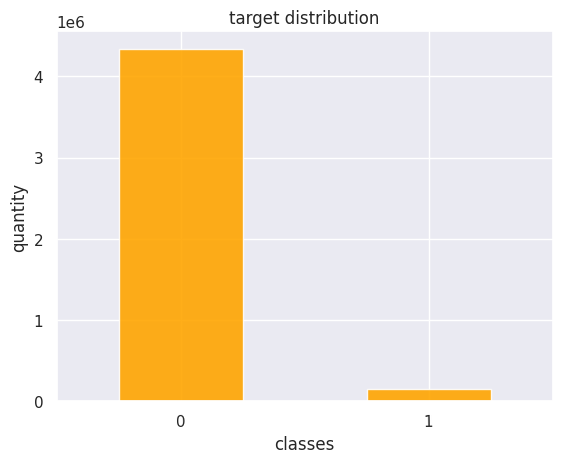

In [ ]:
train['target'].value_counts().plot(kind='bar', title='target distribution', xlabel='classes',
                                     ylabel='quantity', rot=1, color='orange', alpha =0.9,)
plt.show()

## **CATEGORICAL FEATURES**

Изучим категориальные фичи

In [ ]:
print('bin cat features:')
for i in train.drop('target', axis=1).columns:
    if len(train[i].value_counts()) == 2:
        print(i)

bin cat features:
feature_22
feature_347
feature_405
feature_492


In [ ]:
print('cat features:')
for i in train.columns:
    if (len(train[i].value_counts()) > 2) and (len(train[i].value_counts()) < 1000):
        print(i)

cat features:
feature_31
feature_43
feature_61
feature_64
feature_80
feature_83
feature_92
feature_133
feature_143
feature_201
feature_209
feature_251
feature_253
feature_300
feature_343
feature_382
feature_392
feature_406
feature_423
feature_446
feature_449
feature_459
feature_490


### **BIN CAT FEATURES**

In [ ]:
bin_cat_features = ['feature_22','feature_347','feature_405','feature_492']

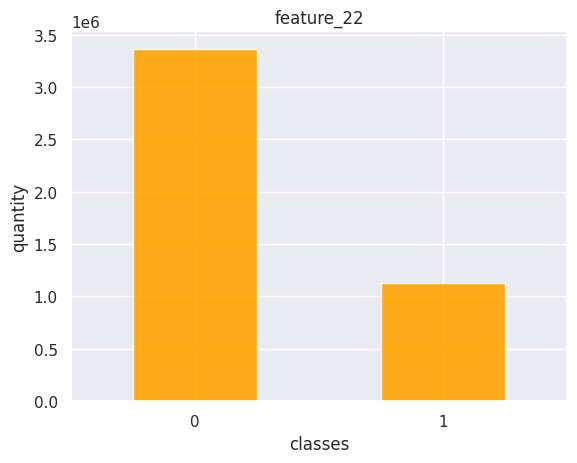

In [ ]:
train['feature_22'].value_counts().plot(kind='bar', title='feature_22', xlabel='classes',
                                     ylabel='quantity', rot=1, color='orange', alpha=0.9)
plt.show()

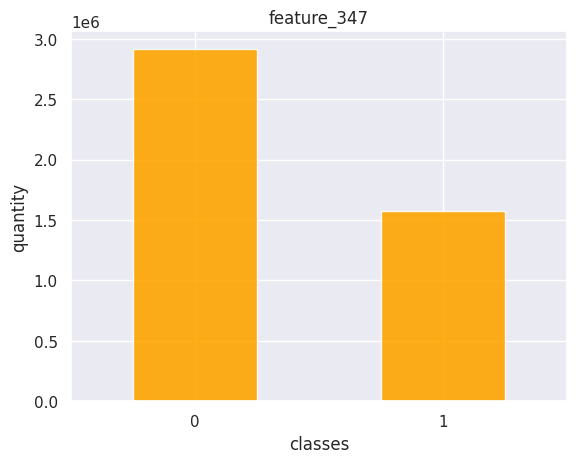

In [ ]:
train['feature_347'].value_counts().plot(kind='bar', title='feature_347', xlabel='classes',
                                     ylabel='quantity', rot=1, color='orange', alpha=0.9)
plt.show()

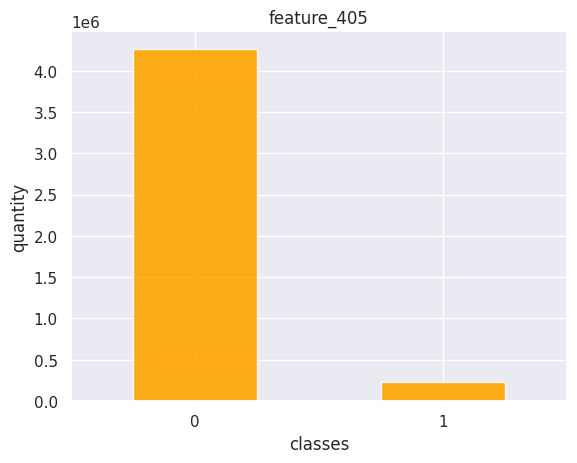

In [ ]:
train['feature_405'].value_counts().plot(kind='bar', title='feature_405', xlabel='classes',
                                     ylabel='quantity', rot=1, color='orange', alpha=0.9)
plt.show()

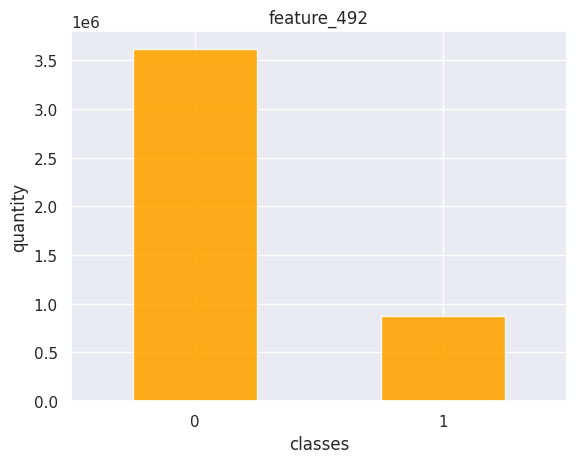

In [ ]:
train['feature_492'].value_counts().plot(kind='bar', title='feature_492', xlabel='classes',
                                     ylabel='quantity', rot=1, color='orange', alpha=0.9)
plt.show()

### **CAT FEATURES**

In [ ]:
cat_features = ['feature_31','feature_61','feature_64','feature_80','feature_83','feature_92','feature_133','feature_143','feature_201','feature_209','feature_251','feature_253',
                'feature_300','feature_343','feature_382','feature_406','feature_423','feature_446','feature_449','feature_459','feature_490']

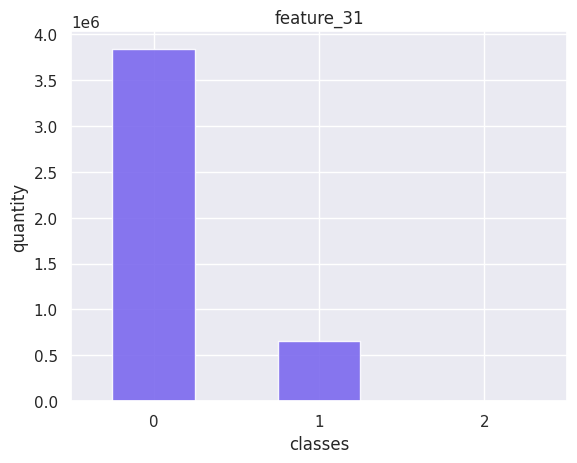

In [ ]:
train['feature_31'].value_counts().plot(kind='bar', title='feature_31', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

In [ ]:
train.groupby(['feature_31'])['target'].sum() / train.groupby(['feature_31'])['target'].count()

,target
feature_31,
0,0.029166
1,0.065849
2,0.038749


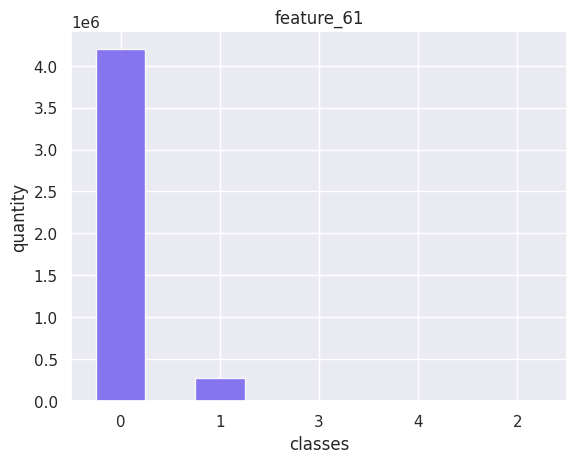

In [ ]:
train['feature_61'].value_counts().plot(kind='bar', title='feature_61', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

In [ ]:
train.groupby(['feature_61'])['target'].sum() / train.groupby(['feature_61'])['target'].count()

,target
feature_61,
0,0.035055
1,0.025674
2,0.009725
3,0.054115
4,0.044152


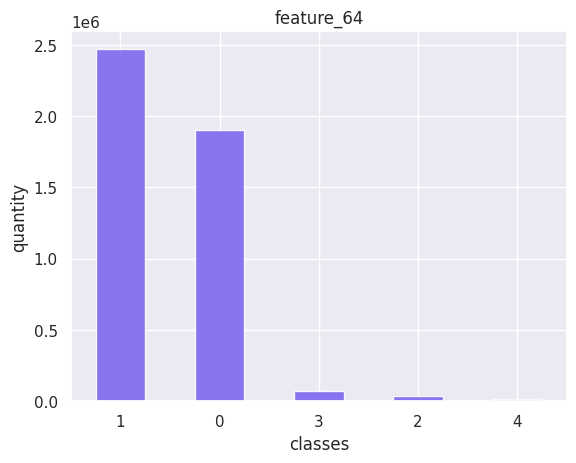

In [ ]:
train['feature_64'].value_counts().plot(kind='bar', title='feature_64', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

In [ ]:
train.groupby(['feature_64'])['target'].sum() / train.groupby(['feature_64'])['target'].count()

,target
feature_64,
0,0.037544
1,0.032222
2,0.030754
3,0.033434
4,0.031568


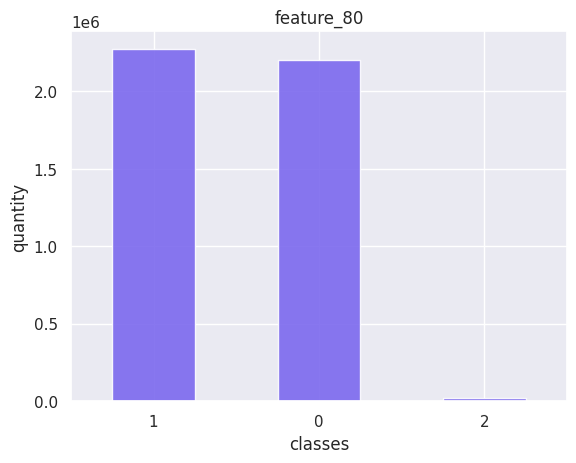

In [ ]:
train['feature_80'].value_counts().plot(kind='bar', title='feature_80', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

In [ ]:
train.groupby(['feature_80'])['target'].sum() / train.groupby(['feature_80'])['target'].count()

,target
feature_80,
0,0.050544
1,0.018252
2,0.123300


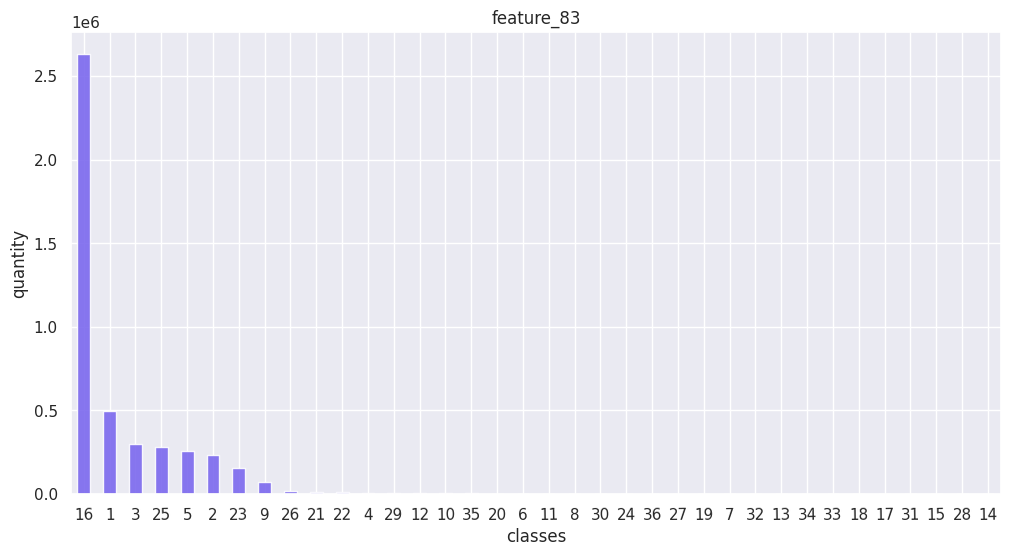

In [ ]:
plt.figure(figsize=(12, 6))
train['feature_83'].value_counts().plot(kind='bar', title='feature_83', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

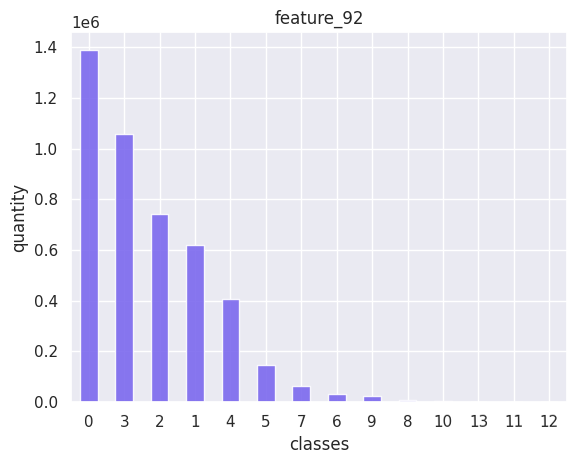

In [ ]:
train['feature_92'].value_counts().plot(kind='bar', title='feature_92', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

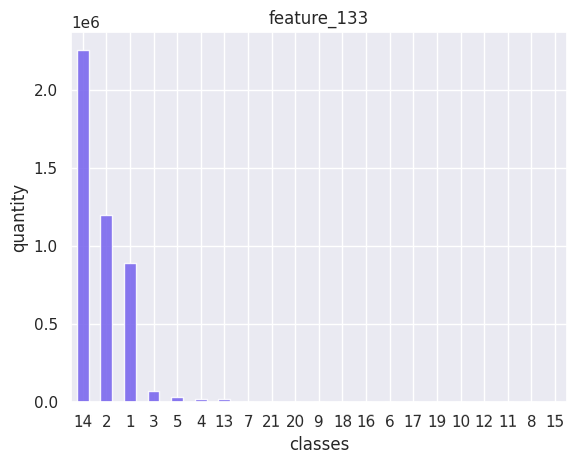

In [ ]:
train['feature_133'].value_counts().plot(kind='bar', title='feature_133', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

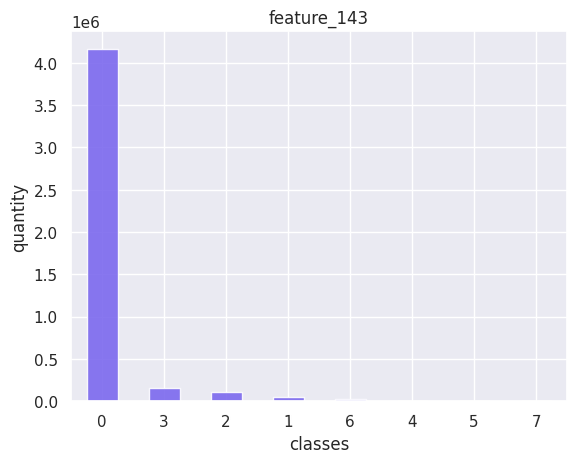

In [ ]:
train['feature_143'].value_counts().plot(kind='bar', title='feature_143', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

In [ ]:
train.groupby(['feature_143'])['target'].sum() / train.groupby(['feature_143'])['target'].count()

,target
feature_143,
0,0.033460
1,0.039387
2,0.042126
3,0.049028
4,0.074260
5,0.067456
6,0.068901
7,0.102848


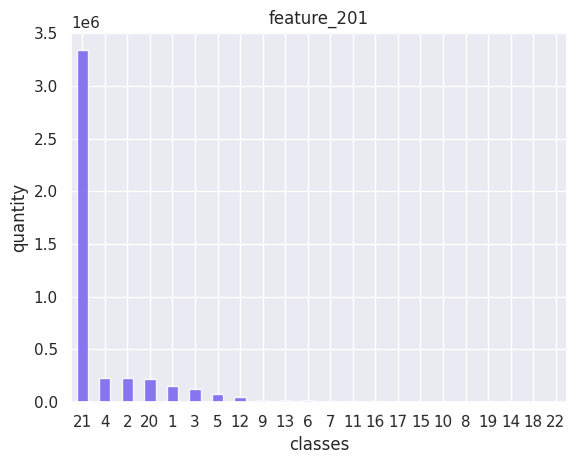

In [ ]:
train['feature_201'].value_counts().plot(kind='bar', title='feature_201', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

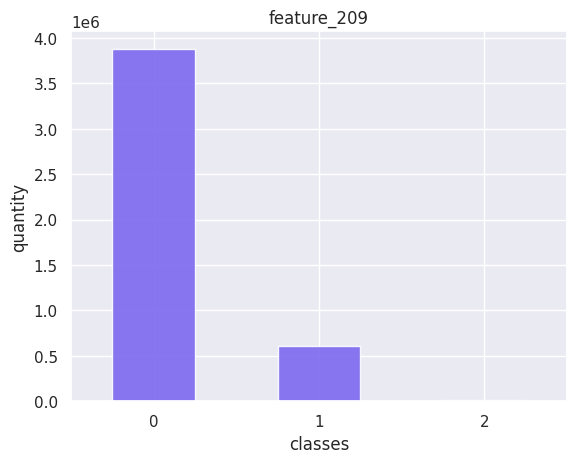

In [ ]:
train['feature_209'].value_counts().plot(kind='bar', title='feature_209', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

In [ ]:
train.groupby(['feature_209'])['target'].sum() / train.groupby(['feature_209'])['target'].count()

,target
feature_209,
0,0.029476
1,0.066525
2,0.045606


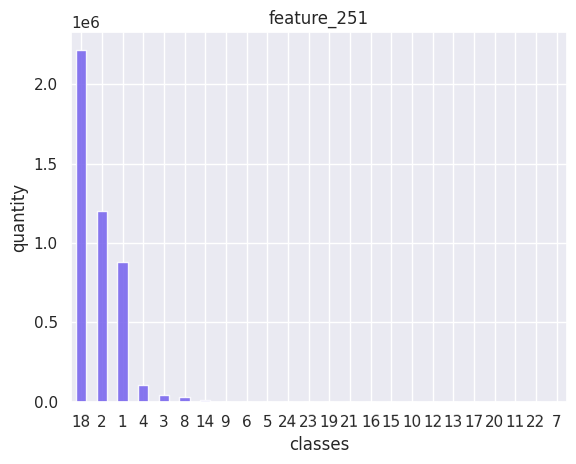

In [ ]:
train['feature_251'].value_counts().plot(kind='bar', title='feature_251', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

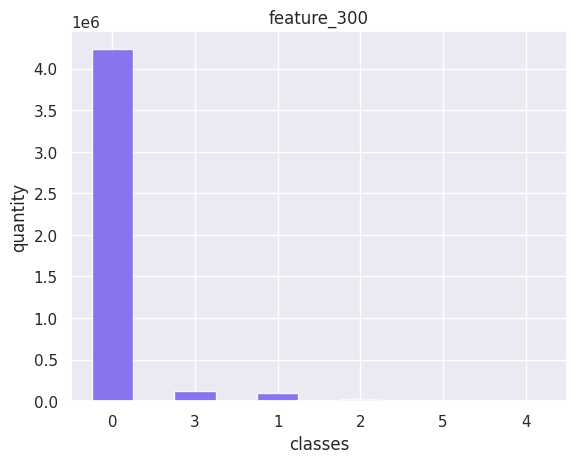

In [ ]:
train['feature_300'].value_counts().plot(kind='bar', title='feature_300', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

In [ ]:
train.groupby(['feature_300'])['target'].sum() / train.groupby(['feature_300'])['target'].count()

,target
feature_300,
0,0.033573
1,0.044341
2,0.040218
3,0.056729
4,0.028884
5,0.039875


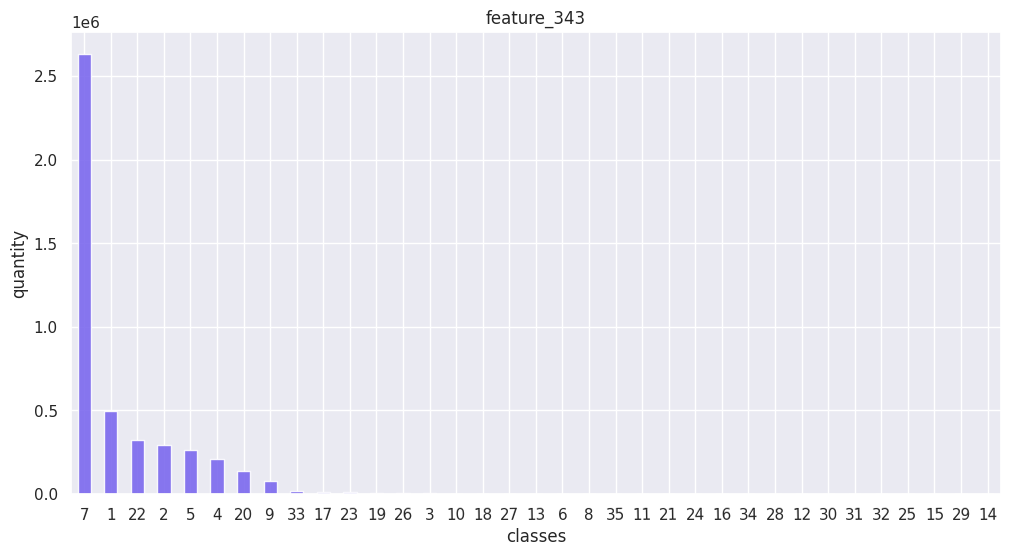

In [ ]:
plt.figure(figsize=(12,6))
train['feature_343'].value_counts().plot(kind='bar', title='feature_343', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

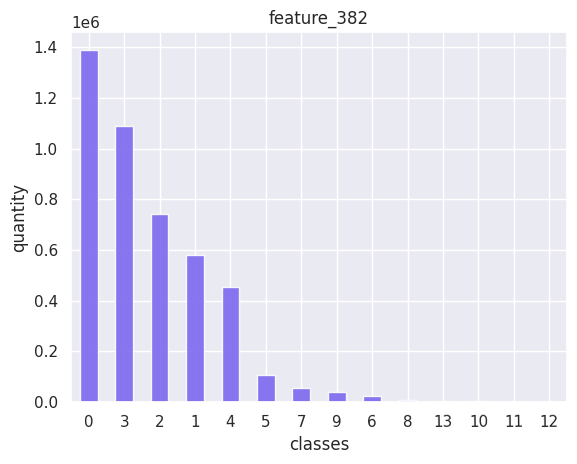

In [ ]:
train['feature_382'].value_counts().plot(kind='bar', title='feature_382', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

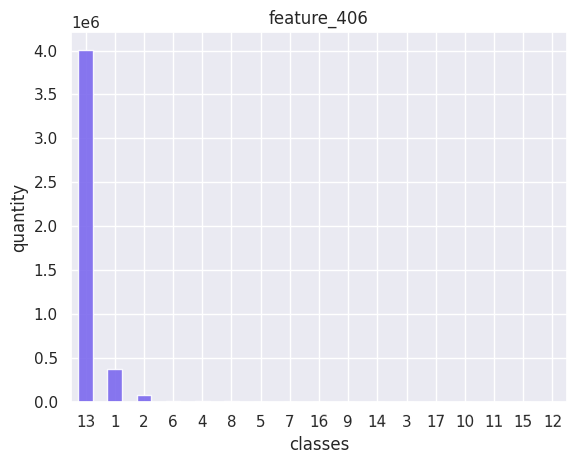

In [ ]:
train['feature_406'].value_counts().plot(kind='bar', title='feature_406', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

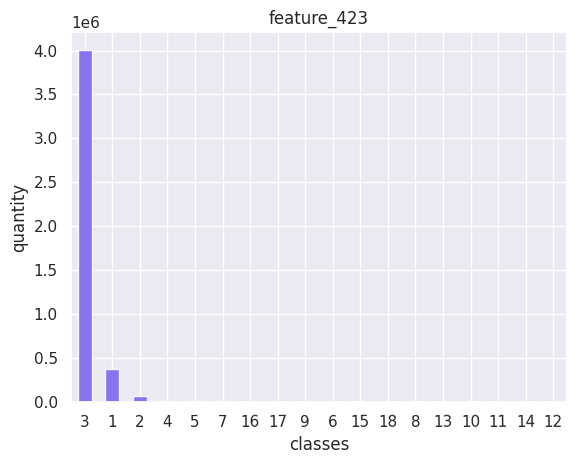

In [ ]:
train['feature_423'].value_counts().plot(kind='bar', title='feature_423', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

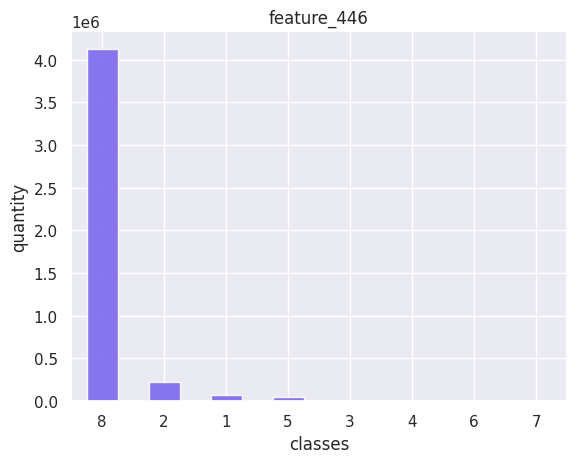

In [ ]:
train['feature_446'].value_counts().plot(kind='bar', title='feature_446', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

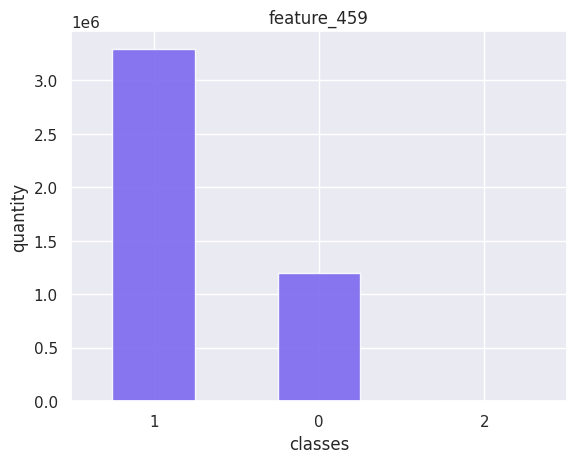

In [ ]:
train['feature_459'].value_counts().plot(kind='bar', title='feature_459', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

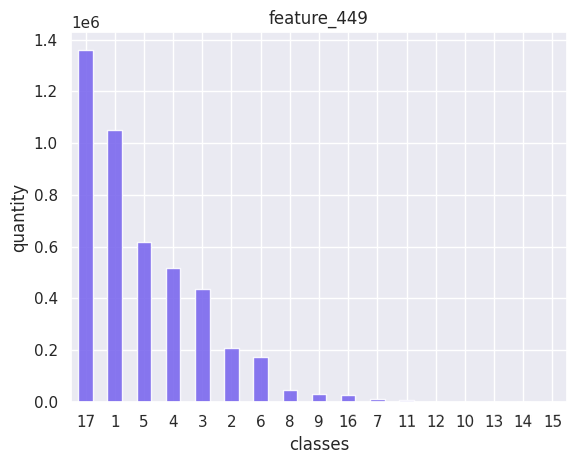

In [ ]:
train['feature_449'].value_counts().plot(kind='bar', title='feature_449', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

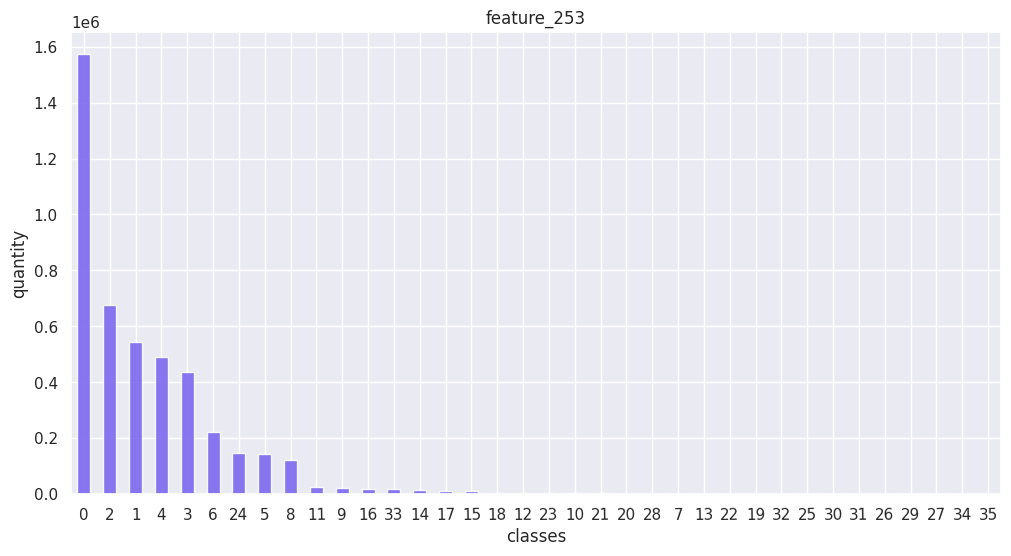

In [ ]:
plt.figure(figsize=(12,6))
train['feature_253'].value_counts().plot(kind='bar', title='feature_253', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

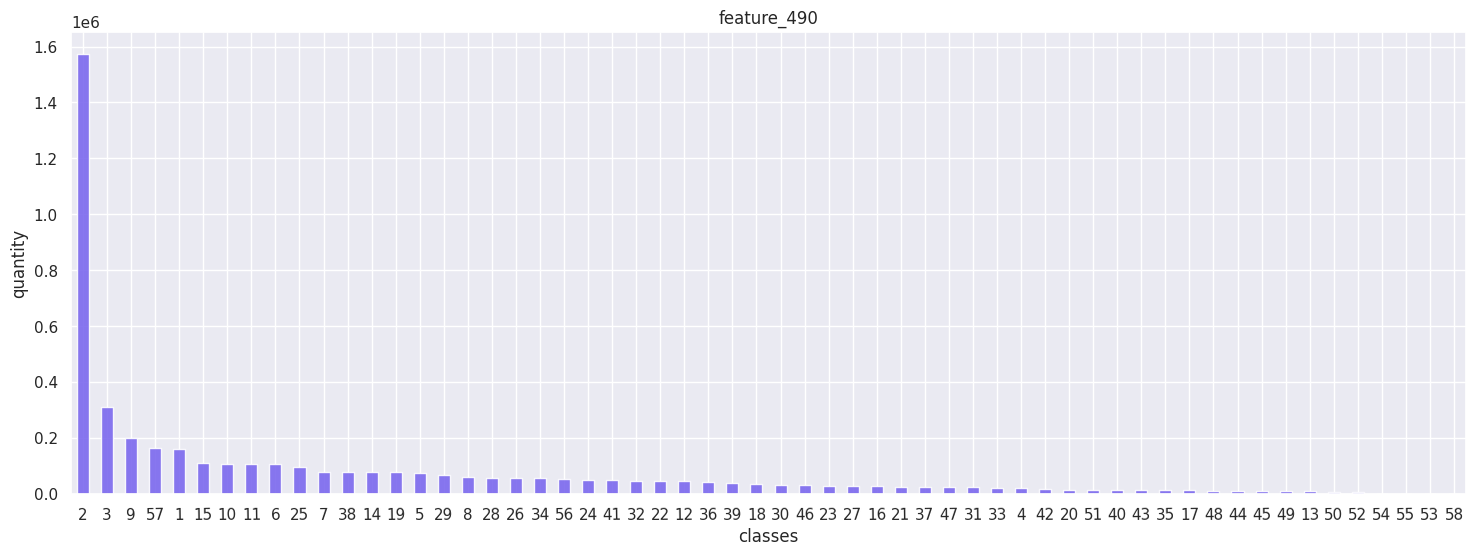

In [ ]:
plt.figure(figsize=(18,6))
train['feature_490'].value_counts().plot(kind='bar', title='feature_490', xlabel='classes',
                                     ylabel='quantity', rot=1, color='mediumslateblue', alpha=0.9)
plt.show()

In [ ]:
for i in cat_features:
    print(i, ': ', train[i].nunique())

feature_31 :  3
feature_61 :  5
feature_64 :  5
feature_80 :  3
feature_83 :  36
feature_92 :  14
feature_133 :  21
feature_143 :  8
feature_201 :  22
feature_209 :  3
feature_251 :  24
feature_253 :  36
feature_300 :  6
feature_343 :  35
feature_382 :  14
feature_406 :  17
feature_423 :  18
feature_446 :  8
feature_449 :  17
feature_459 :  3
feature_490 :  58


In [ ]:
total_cols = 0
for i in cat_features:
    total_cols += train[i].nunique()
    total_cols - 1 # drop_first=True
total_cols

356

## **NUMERICAL FEATURES**

Изучить все числовые признаки не получится, так как, их слишком много, поэтому посмотрим на 10 рандомных

In [ ]:
num_features = train.drop(cat_features+bin_cat_features+['target'], axis=1).columns

In [ ]:
len(num_features)

466

In [ ]:
random_num_features = ['feature_1', 'feature_18', 'feature_42', 'feature_67', 'feature_134', 'feature_189', 'feature_256', 'feature_389', 'feature_444', 'feature_496']

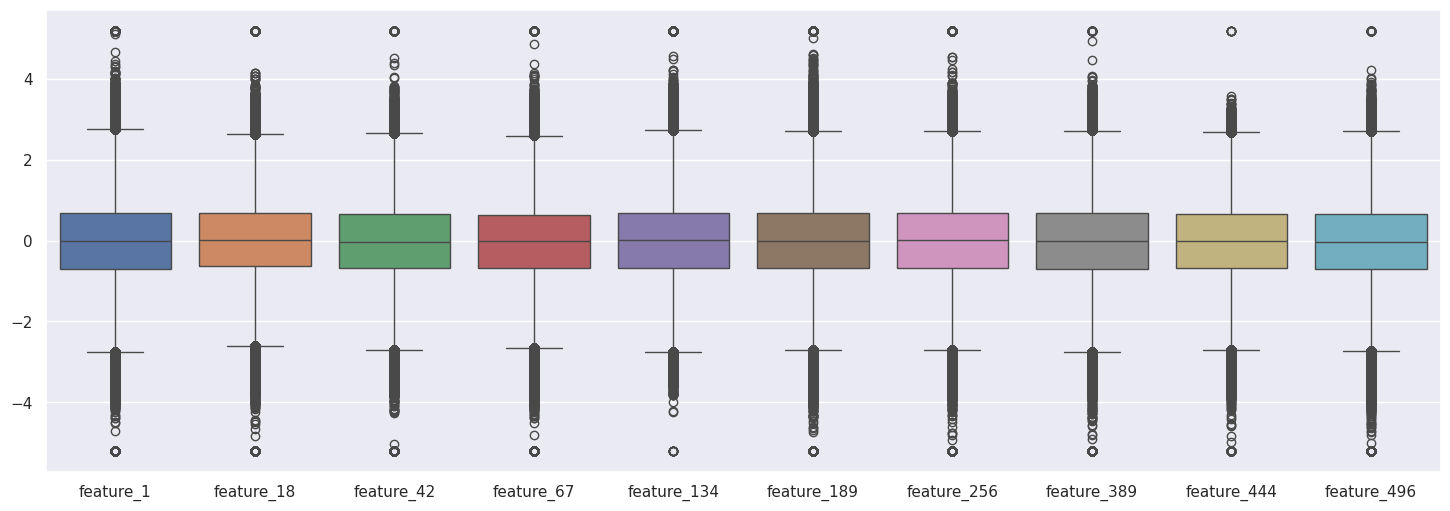

In [ ]:
plt.figure(figsize=(18, 6))
sns.boxplot(data=train[random_num_features])
plt.show()

Очевидно, что они были предварительно обработаны

# **SHAP+MODEL FEATURE IMPORTANCES**

Теперь для того, чтобы понять какие фичи можно удалить и как лучше преобразовать категориальные фичи обучить базовый катбуст и посчитаем важность фичей с помощью шапа

In [ ]:
num_df = train[num_features]

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(num_df, train['target'], test_size=0.1, stratify=train['target'], random_state=42)

In [ ]:
x_train.shape, x_valid.shape

((4041421, 466), (449047, 466))

In [ ]:
model = CatBoostClassifier(random_state=67, eval_metric='AUC', early_stopping_rounds=50, iterations=15800, learning_rate=0.1, verbose=False)

In [ ]:
model.fit(x_train, y_train, eval_set=(x_valid, y_valid))

In [ ]:
imp = pd.DataFrame(x_valid.columns,columns=['name'])

In [ ]:
imp['model_importance'] = model.feature_importances_

In [ ]:
shap.initjs
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_valid)

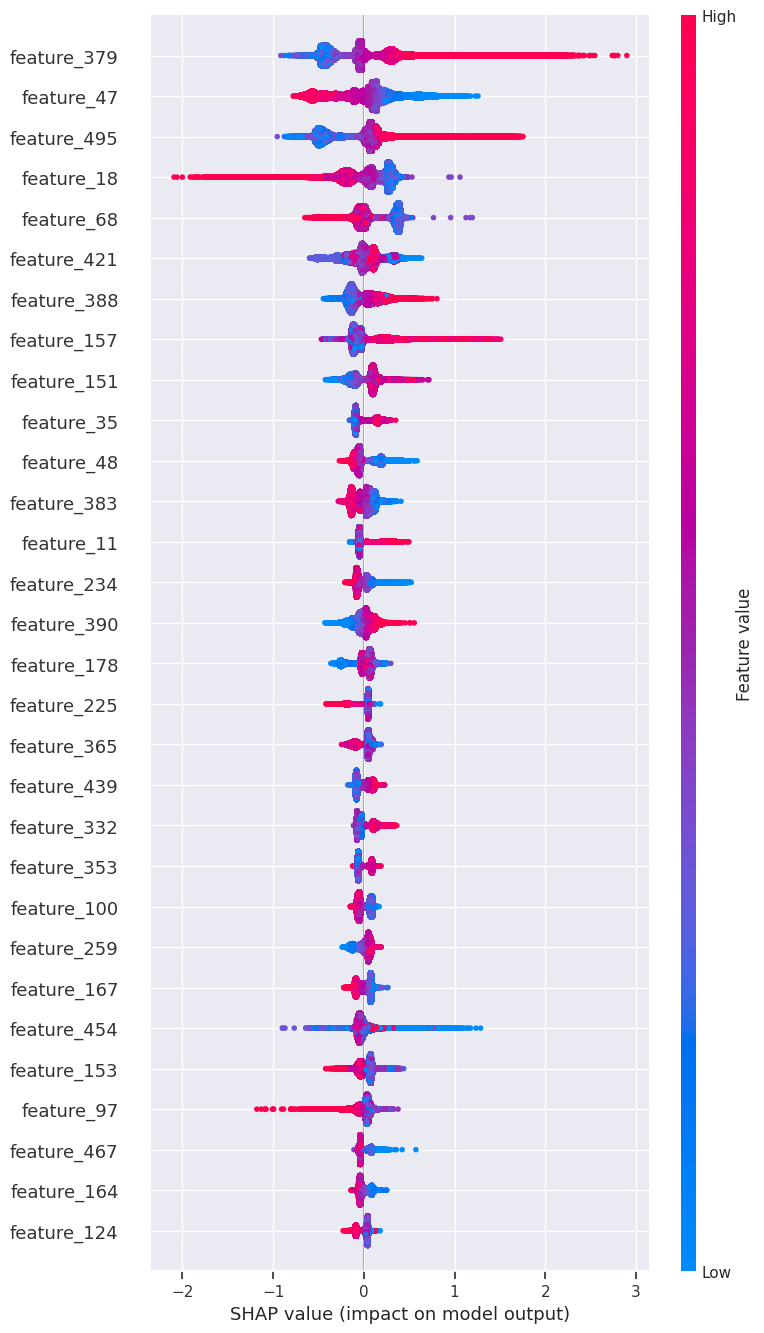

In [ ]:
shap.summary_plot(shap_values, x_valid, max_display=30)

In [ ]:
tmp0 = pd.DataFrame({'name': x_valid.columns, 'shap_value': np.mean(abs(shap_values), axis=0)})
tmp0 = tmp0.sort_values('shap_value', ascending=False)
tmp0.index = range(1, tmp0.shape[0]+1)

In [ ]:
tmp0

,name,shap_value
1,feature_379,0.293892
2,feature_47,0.269381
3,feature_495,0.247459
4,feature_18,0.201470
5,feature_68,0.169883
...,...,...
448,feature_453,0.000460
449,feature_95,0.000452
450,feature_438,0.000413
451,feature_38,0.000392


# **DATA PREP**

Теперь соберем все вместе

In [ ]:
cat_features = ['feature_31','feature_61','feature_64','feature_80','feature_83','feature_92','feature_133','feature_143','feature_201','feature_209','feature_251','feature_253',
                'feature_300','feature_343','feature_382','feature_406','feature_423','feature_446','feature_449','feature_459','feature_490']

In [ ]:
cols_to_drop = ['feature_17', 'feature_21', 'feature_27', 'feature_166', 'feature_173', 'feature_299', 'feature_424', 'feature_434', 'feature_191'] # duplicates and high correlated

Напишем предобработку категориальных фичей, на основе анализа шапа моделей

In [ ]:
def preprocess_83(x):
    if x in [31, 14, 33, 27, 34, 15, 17, 32, 36, 30, 18]:
        return -1
    else:
        return x

def preprocess_133(x):
    if x in [11, 15, 8, 17, 19, 9, 7, 10, 12, 6, 16, 18, 20]:
        return -1
    else:
        return x

def preprocess_201(x):
    if x in [22, 14]:
        return -1
    else:
        return x

def preprocess_251(x):
    if x in [17, 7, 20, 13, 22, 11, 19, 10, 21, 12, 16, 24, 15, 23]:
        return -1
    else:
        return x

def preprocess_253(x):
    if x in [31, 35, 34, 29, 27, 26, 19, 25, 32, 30]:
        return -1
    else:
        return x

def preprocess_343(x):
    if x in [29, 14, 15, 30, 32, 25, 31, 28, 21, 34, 6, 11, 13]:
        return -1
    else:
        return x

def preprocess_382(x):
    if x in [12, 11]:
        return -1
    else:
        return x

def preprocess_406(x):
    if x in [10, 14, 17, 11, 12, 15, 3]:
        return -1
    else:
        return x

def preprocess_423(x):
    if x in [11, 14, 12, 13, 10, 8, 18, 6, 15, 17, 9]:
        return -1
    else:
        return x

def preprocess_449(x):
    if x in [15, 14, 12, 13, 10]:
        return -1
    else:
        return x

def preprocess_490(x):
    if x in [58, 53, 55]:
        return -1
    else:
        return x

Выделим фичи, которые не представлены в тестовой выборке

In [ ]:
no_cols = ['feature_83_4', 'feature_83_7', 'feature_83_8', 'feature_83_12', 'feature_83_13', 'feature_83_20', 'feature_83_22',
           'feature_83_24', 'feature_133_4', 'feature_251_3', 'feature_251_5', 'feature_251_6', 'feature_251_9', 'feature_343_3',
           'feature_343_8', 'feature_343_12', 'feature_343_18', 'feature_343_19', 'feature_406_6', 'feature_446_7', 'feature_459_2']

Выделим фичи, которые по мнению шапа имеют нулевой вес

In [ ]:
zero_weight_cols = ['feature_490_24','feature_253_9','feature_83_1','feature_406_4','feature_64_3','feature_31_2','feature_253_21','feature_490_50',
                    'feature_61_2','feature_253_17','feature_253_11','feature_490_43','feature_490_40','feature_64_2','feature_300_5','feature_490_18',
                    'feature_83_35','feature_446_3','feature_382_4','feature_382_6','feature_446_6','feature_446_4','feature_423_5','feature_423_4',
                    'feature_382_8','feature_406_9','feature_382_9','feature_406_7','feature_251_4','feature_449_7','feature_490_15','feature_343_23',
                    'feature_490_14','feature_92_8','feature_22','feature_92_9','feature_490_5','feature_343_35','feature_490_4','feature_92_12',
                    'feature_343_26','feature_343_33','feature_143_5'] # by shap catboost and lgbm

Выделим фичи, которые по мнению шапа имеют очень слабый вес (<= 0.001%)

In [ ]:
weak_cols = ['feature_490_13','feature_490_46','feature_201_5','feature_490_48','feature_201_15','feature_490_35','feature_343_17',
             'feature_490_54','feature_251_8','feature_61_3','feature_406_5','feature_253_12','feature_343_27','feature_92_11',
             'feature_382_13','feature_253_18','feature_83_10','feature_253_20','feature_201_10','feature_143_7','feature_343_24',
             'feature_201_18','feature_83_6','feature_253_23','feature_253_13','feature_253_22','feature_253_28','feature_92_13',
             'feature_406_16','feature_253_7','feature_201_8','feature_343_16','feature_83_19','feature_83_28'] # by shap catboost and lgbm

Теперь остается только применить предобработку и удалить ненужные фичи и можно начинать моделировать